In [2]:
%reset
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.datasets as dsets
import torchvision.transforms as transforms

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
train_dataset = dsets.MNIST('./data', train=True, transform = transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST('./data', train=False, transform = transforms.ToTensor())

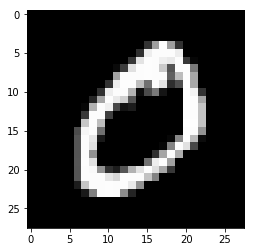

In [4]:
plt.imshow(train_dataset[1][0].numpy().reshape(28,28), cmap='gray')

In [6]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
import collections
isinstance(test_loader, collections.Iterable)

True

In [31]:
class FeedforwardNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        y = self.fc1(x)
        y = self.activation(y)
        y = self.fc2(y)
        return y

In [32]:
input_dim = 28*28
output_dim = 10
hidden_dim = 100
if torch.cuda.is_available():
    model = FeedforwardNeuralNetwork(input_dim, hidden_dim, output_dim).cuda()
else:
    model = FeedforwardNeuralNetwork(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [33]:
iter = 0
maxAccuracy = 0
for epoch in range(10):
    for i, (image, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            inputs = Variable(image.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            inputs = Variable(image.view(-1, 28*28))
            labels = Variable(labels)
        
        outputs = model.forward(inputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for i, (image, labels) in enumerate(test_loader):
                if torch.cuda.is_available():
                    inputs = Variable(image.view(-1, 28*28).cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs = Variable(image.view(-1, 28*28))
                    labels = Variable(labels)
                
                outputs = model.forward(inputs)
                _, predicted = torch.max(outputs.data,1)
                
                correct += (predicted.cpu() == labels.cpu()).sum()
                total += labels.size(0)
            accuracy = 100 * correct / total
            if accuracy > maxAccuracy:
                maxAccuracy = accuracy
                torch.save(model.state_dict(), 'FeedforwardNNModel.pkl')
            print ("iter: {}, accuracy: {}, loss: {}".format(iter, accuracy, loss.data))

iter: 500, accuracy: 91, loss: 0.5067033767700195
iter: 1000, accuracy: 92, loss: 0.22137676179409027
iter: 1500, accuracy: 93, loss: 0.19243893027305603
iter: 2000, accuracy: 94, loss: 0.20761285722255707
iter: 2500, accuracy: 95, loss: 0.126953586935997
iter: 3000, accuracy: 95, loss: 0.10229724645614624
iter: 3500, accuracy: 96, loss: 0.1690695583820343
iter: 4000, accuracy: 96, loss: 0.061844926327466965
iter: 4500, accuracy: 96, loss: 0.13637210428714752
iter: 5000, accuracy: 96, loss: 0.08191150426864624
iter: 5500, accuracy: 96, loss: 0.054165612906217575
iter: 6000, accuracy: 96, loss: 0.04679423198103905


In [15]:
print(model)

FeedforwardNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (activation): Sigmoid()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
